# Titanic Classification....

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import tree
import graphviz

#import os

#print(os.listdir("../input"))

data = pd.read_csv("../input/train.csv")
data.columns = [x.lower() for x in data.columns]
#testdata = pd.read_csv("../input/test.csv")
#testdata.columns = [x.lower() for x in testdata.columns]
#dftest = pd.DataFrame(testdata)
df = pd.DataFrame(data)
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Clean Data
* Learning to use get dummies was awesome....
* Added df.fillna to handle errors



In [2]:
df2 = pd.get_dummies(data=df, columns=['embarked', 'pclass', 'sex'])
df2.drop(columns=['name', 'ticket', 'passengerid', 'cabin'], inplace=True)
df2.fillna(df2.mean(), inplace=True)
df2.corr()

,survived,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3,sex_female,sex_male
survived,1.000000,-0.069809,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660,0.285904,0.093349,-0.322308,0.543351,-0.543351
age,-0.069809,1.000000,-0.232625,-0.179191,0.091566,0.032024,-0.013855,-0.027121,0.319916,0.006589,-0.281004,-0.084153,0.084153
sibsp,-0.035322,-0.232625,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941,-0.054582,-0.055932,0.092548,0.114631,-0.114631
parch,0.081629,-0.179191,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036,-0.017633,-0.000734,0.015790,0.245489,-0.245489
fare,0.257307,0.091566,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603,0.591711,-0.118557,-0.413333,0.182333,-0.182333
embarked_C,0.168240,0.032024,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359,0.296423,-0.125416,-0.153329,0.082853,-0.082853
embarked_Q,0.003650,-0.013855,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624,-0.155342,-0.127301,0.237449,0.074115,-0.074115
embarked_S,-0.155660,-0.027121,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000,-0.170379,0.192061,-0.009511,-0.125722,0.125722
pclass_1,0.285904,0.319916,-0.054582,-0.017633,0.591711,0.296423,-0.155342,-0.170379,1.000000,-0.288585,-0.626738,0.098013,-0.098013
pclass_2,0.093349,0.006589,-0.055932,-0.000734,-0.118557,-0.125416,-0.127301,0.192061,-0.288585,1.000000,-0.565210,0.064746,-0.064746


# Split out training and test data

In [3]:
data = df2.drop(columns='survived')
target = df['survived']
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=0)

# Train decision tree model
Ran into initial issue with blank values...
Does Sklearn use a arrays vs dataframes??? Saw that there is sklearn_pandas? or numpy? What is the difference?
https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

In [4]:
model = DecisionTreeClassifier()
model.fit(data_train, target_train)
target_predict = model.predict(data_test)

print(confusion_matrix(target_test,target_predict))
print(classification_report(target_test, target_predict))


[[93 17]
 [23 46]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.73      0.67      0.70        69

   micro avg       0.78      0.78      0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179



# K-folds
https://stackoverflow.com/questions/47257952/how-to-get-average-score-of-k-fold-cross-validation-with-sklearn


In [5]:
from sklearn.model_selection import KFold
data2 = data_train.values
target2 = target_train.values
kf = KFold(n_splits=10)
bettermodel = DecisionTreeClassifier()
for train_index, test_index in kf.split(data2):
    data2_train, data2_test = data2[train_index], data2[test_index]
    target2_train, target2_test = target2[train_index], target2[test_index]
    bettermodel.fit(data2_train, target2_train)

# BetterModel Performance

In [6]:
print(confusion_matrix(target_test, bettermodel.predict(data_test)))
print(classification_report(target_test,bettermodel.predict(data_test))) 

[[94 16]
 [23 46]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       110
           1       0.74      0.67      0.70        69

   micro avg       0.78      0.78      0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



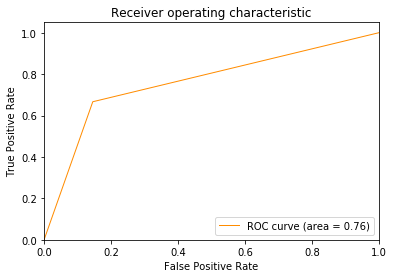

In [7]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(target_test, bettermodel.predict(data_test))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
dot_data = tree.export_graphviz(bettermodel, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [ ]:
##Gender
#gender = df.pivot(index='passengerid', columns='sex', values='sex')
#df2 = df.join(gender, on="passengerid")
#df2.female.replace("female", 1,  inplace=True)
#df2.female.fillna(0, inplace=True)
#df2.male.replace("male", 1,  inplace=True)
#df2.male.fillna(0, inplace=True)


#Embarked Location
# Data Key: C = Cherbourg, Q = Queenstown, S = Southampton
#df.embarked.fillna('Unknown', inplace=True)
#embarked = df.pivot(index='passengerid', columns='embarked', values='embarked')
#embarked.C.replace('C', 1, inplace=True)
#embarked.C.fillna(0, inplace=True)
#embarked.Q.replace('Q', 1, inplace=True)
#embarked.Q.fillna(0, inplace=True)
#embarked.S.replace('S', 1, inplace=True)
#embarked.S.fillna(0, inplace=True)
#embarked.Unknown.replace('Unknown', 1, inplace=True)
#embarked.Unknown.fillna(0, inplace=True)
#embarked = embarked.rename(columns = {'C':'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
#df2 = df2.join(embarked, on='passengerid')


#Remove Columns
#df2.drop(columns=['name', 'ticket', 'sex', 'embarked', 'passengerid', 'cabin'], inplace=True)

#df2.corr()

#df2
